In [4]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [5]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [6]:
tetramer = ampal.load_pdb('1gcl.pdb')

In [7]:
tetramer.sequences

['RMKQIEDKLEEILSKLYHIENELARIKKLLG',
 'RMKQIEDKLEEILSKLYHIENELARIKKLLG',
 'RMKQIEDKLEEILSKLYHIENELARIKKLLG',
 'RMKQIEDKLEEILSKLYHIENELARIKKLLG']

In [8]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [14]:
specification = specs.CoiledCoil.from_parameters

In [15]:
sequences = ['MKQIEDKIEELLSKIYHLENEIARLKKLIG', 'MKQIEDKIEELLSKIYHLENEIARLKKLIG']

In [16]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 30),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['a'], 27),  
]

In [17]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 30, 5.0, 200, 0]


In [18]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [19]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [20]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	61   	-878.219	36.5478	-968.955	-791.361
1  	70   	-913.001	27.1752	-986.905	-869.201
2  	76   	-939.054	13.5091	-986.905	-914.561
3  	66   	-950.595	9.12978	-987.333	-936.669
4  	72   	-958.166	8.38519	-987.383	-948.103
5  	67   	-961.666	9.95578	-987.415	-953.406
6  	78   	-965.576	11.8106	-988.867	-955.72 
7  	58   	-970.923	13.1163	-988.867	-956.751
8  	70   	-977.789	12.4111	-988.867	-957.733
9  	78   	-987.16 	2.09545	-988.867	-975.763
10 	66   	-988.062	0.480039	-988.981	-987.277
11 	71   	-988.401	0.402315	-989.044	-987.655
12 	70   	-988.737	0.161753	-989.044	-988.321
13 	70   	-988.853	0.0901763	-989.077	-988.698
14 	65   	-988.916	0.074641 	-989.082	-988.802
15 	69   	-988.965	0.0805227	-989.173	-988.843
16 	66   	-989.022	0.0628314	-989.173	-988.918
17 	89   	-989.071	0.0418919	-989.173	-988.99 
18 	70   	-989.097	0.0318838	-989.173	-989.042
19 	75   	-989.113	0.025836 	-989.18 	-989.071
20 	71   	-989.129	0.0242586	-989.189	

In [21]:
optimized_model_ga = opt_ga.best_model

In [22]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-989.4110637273532

In [23]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [24]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

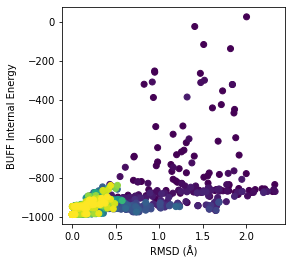

In [25]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [26]:
f = open('p-IL-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [27]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [28]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg    	std    	min     	max     
0  	100  	-860.51	86.6149	-957.344	-437.845
1  	100  	-902.096	35.4299	-957.344	-706.917
2  	100  	-919.97 	22.6879	-958.176	-860.273
3  	100  	-932.515	16.2334	-958.176	-886.621
4  	100  	-941.409	10.7394	-987.213	-911.486
5  	100  	-946.9  	9.01816	-987.213	-916.163
6  	100  	-950.006	7.40196	-987.213	-932.946
7  	100  	-952.661	7.79094	-987.213	-932.946
8  	100  	-954.498	8.16241	-988.983	-937.162
9  	100  	-956.912	8.41998	-988.983	-941.467
10 	100  	-958.419	8.48593	-988.983	-942.623
11 	100  	-960.262	8.44353	-988.983	-947.464
12 	100  	-961.901	8.61367	-988.983	-948.176
13 	100  	-963.521	8.76226	-988.983	-951.076
14 	100  	-964.704	8.88095	-988.983	-952.463
15 	100  	-966.271	8.65239	-988.983	-953.502
16 	100  	-967.67 	8.36848	-988.983	-953.502
17 	100  	-969.42 	8.49075	-988.983	-953.502
18 	100  	-971.106	8.28309	-988.983	-953.502
19 	100  	-973.404	7.94811	-989.408	-953.502
20 	100  	-975.674	8.09772	-993.11 	-953.502
21 	100  	-9

In [29]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-993.1103470969945

In [30]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [31]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

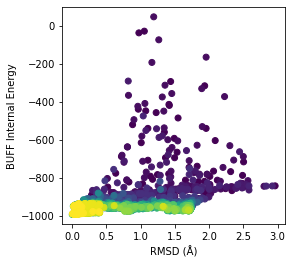

In [32]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [33]:
f = open('p-IL-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [34]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [35]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-796.781	182.915	-954.389	-211.312
1  	86   	-795.283	210.86 	-960.2  	165.239 
2  	66   	-811.363	163.367	-932.822	165.239 
3  	83   	-873.862	87.0805	-955.715	-545.435
4  	95   	-824.722	136.816	-961.668	-427.402
5  	73   	-833.974	173.541	-958.858	34.5328 
6  	76   	-840.233	152.269	-942.07 	34.5328 
7  	89   	-885.184	113.139	-954.179	-35.3836
8  	95   	-840.595	158.318	-958.472	-35.3836
9  	71   	-804.452	175.515	-959.12 	143.167 
10 	65   	-824.181	166.242	-955.971	143.167 
11 	76   	-794.612	187.166	-957.203	143.167 
12 	88   	-840.941	189.579	-953.207	94.881  
13 	84   	-827.999	188.658	-958.59 	94.881  
14 	78   	-835.259	194.527	-962.594	242.601 
15 	86   	-876.968	147.858	-954.145	242.601 
16 	89   	-886.647	136.551	-961.739	242.601 
17 	85   	-803.428	175.131	-953.208	242.601 
18 	73   	-794.897	168.803	-956.136	24.5525 
19 	74   	-721.812	263.669	-953.843	138.884 
20 	83   	-819.858	230.561	-955.474	138.884 
21 	88   	

In [36]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-968.5055018068164

In [37]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [38]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

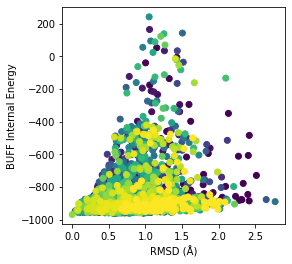

In [39]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [40]:
f = open('p-IL-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [41]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [42]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-766.237	165.379	-950.085	-321.165
1  	100  	-850.738	118.466	-953.282	-273.637
2  	100  	-890.659	71.5551	-963.631	-510.663
3  	100  	-937.509	13.5169	-963.044	-888.627
4  	100  	-940.795	13.1285	-962.024	-887.12 
5  	100  	-938.452	19.3691	-962.918	-864.051
6  	100  	-946.81 	10.5425	-963.41 	-909.43 
7  	100  	-949.109	12.5707	-971.629	-894.863
8  	100  	-950.09 	11.7654	-973.149	-903.961
9  	100  	-948.617	11.7748	-973.588	-910.469
10 	100  	-951.39 	10.7276	-973.899	-922.855
11 	100  	-954.843	10.2037	-974.125	-926.835
12 	100  	-960.634	10.111 	-975.428	-929.291
13 	100  	-962.375	11.832 	-974.017	-915.579
14 	100  	-963.293	13.9341	-975.25 	-914.505
15 	100  	-965.14 	12.1182	-975.425	-928.742
16 	100  	-966.607	11.8504	-975.783	-941.266
17 	100  	-966.361	12.6773	-975.632	-931.725
18 	100  	-967.059	12.546 	-975.792	-944.114
19 	100  	-968.786	11.9668	-975.572	-932.458
20 	100  	-963.862	14.1285	-975.791	-944.394
21 	100  	

In [43]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-976.3037282525665

In [44]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [45]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

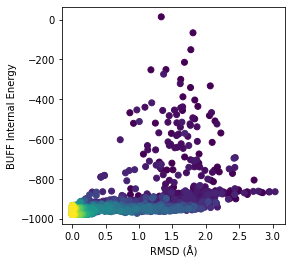

In [46]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [47]:
f = open('p-IL-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)